In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Record of the given dataset

In [5]:
data=pd.read_csv("/content/data.csv",encoding='ISO-8859-1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Information of the columns in a data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Description of numeric feature

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Description of non-numeric feature

In [8]:
data.describe(exclude=['int64','float64']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Check for null values

In [9]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


Shape of the available data

In [10]:
data.shape

(541909, 8)

Delete all the missing value

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(406829, 8)

In [13]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


checking of weather negative values present in quantity and unit price

In [14]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


Drop the negative values or quantity

In [15]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [16]:
data.shape

(397924, 8)

Calculation of total amount or monetry value

In [17]:
data['Sales']=data['Quantity']*data['UnitPrice']
new_data=data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


Calculating the transaction of each customer

In [18]:
num_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
num_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


Calculate last transaction

In [19]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [20]:
data['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [21]:
data['Last transaction']=(data['InvoiceDate'].max()-data['InvoiceDate']).dt.days

In [22]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373


In [23]:
lt=data.groupby(['CustomerID','Country'])['Last transaction'].max().reset_index()
lt.head()

,CustomerID,Country,Last transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309


In [24]:
merge_table=pd.merge(lt,num_trans,how='inner',on='CustomerID')
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


Removal of outlier using boxplot

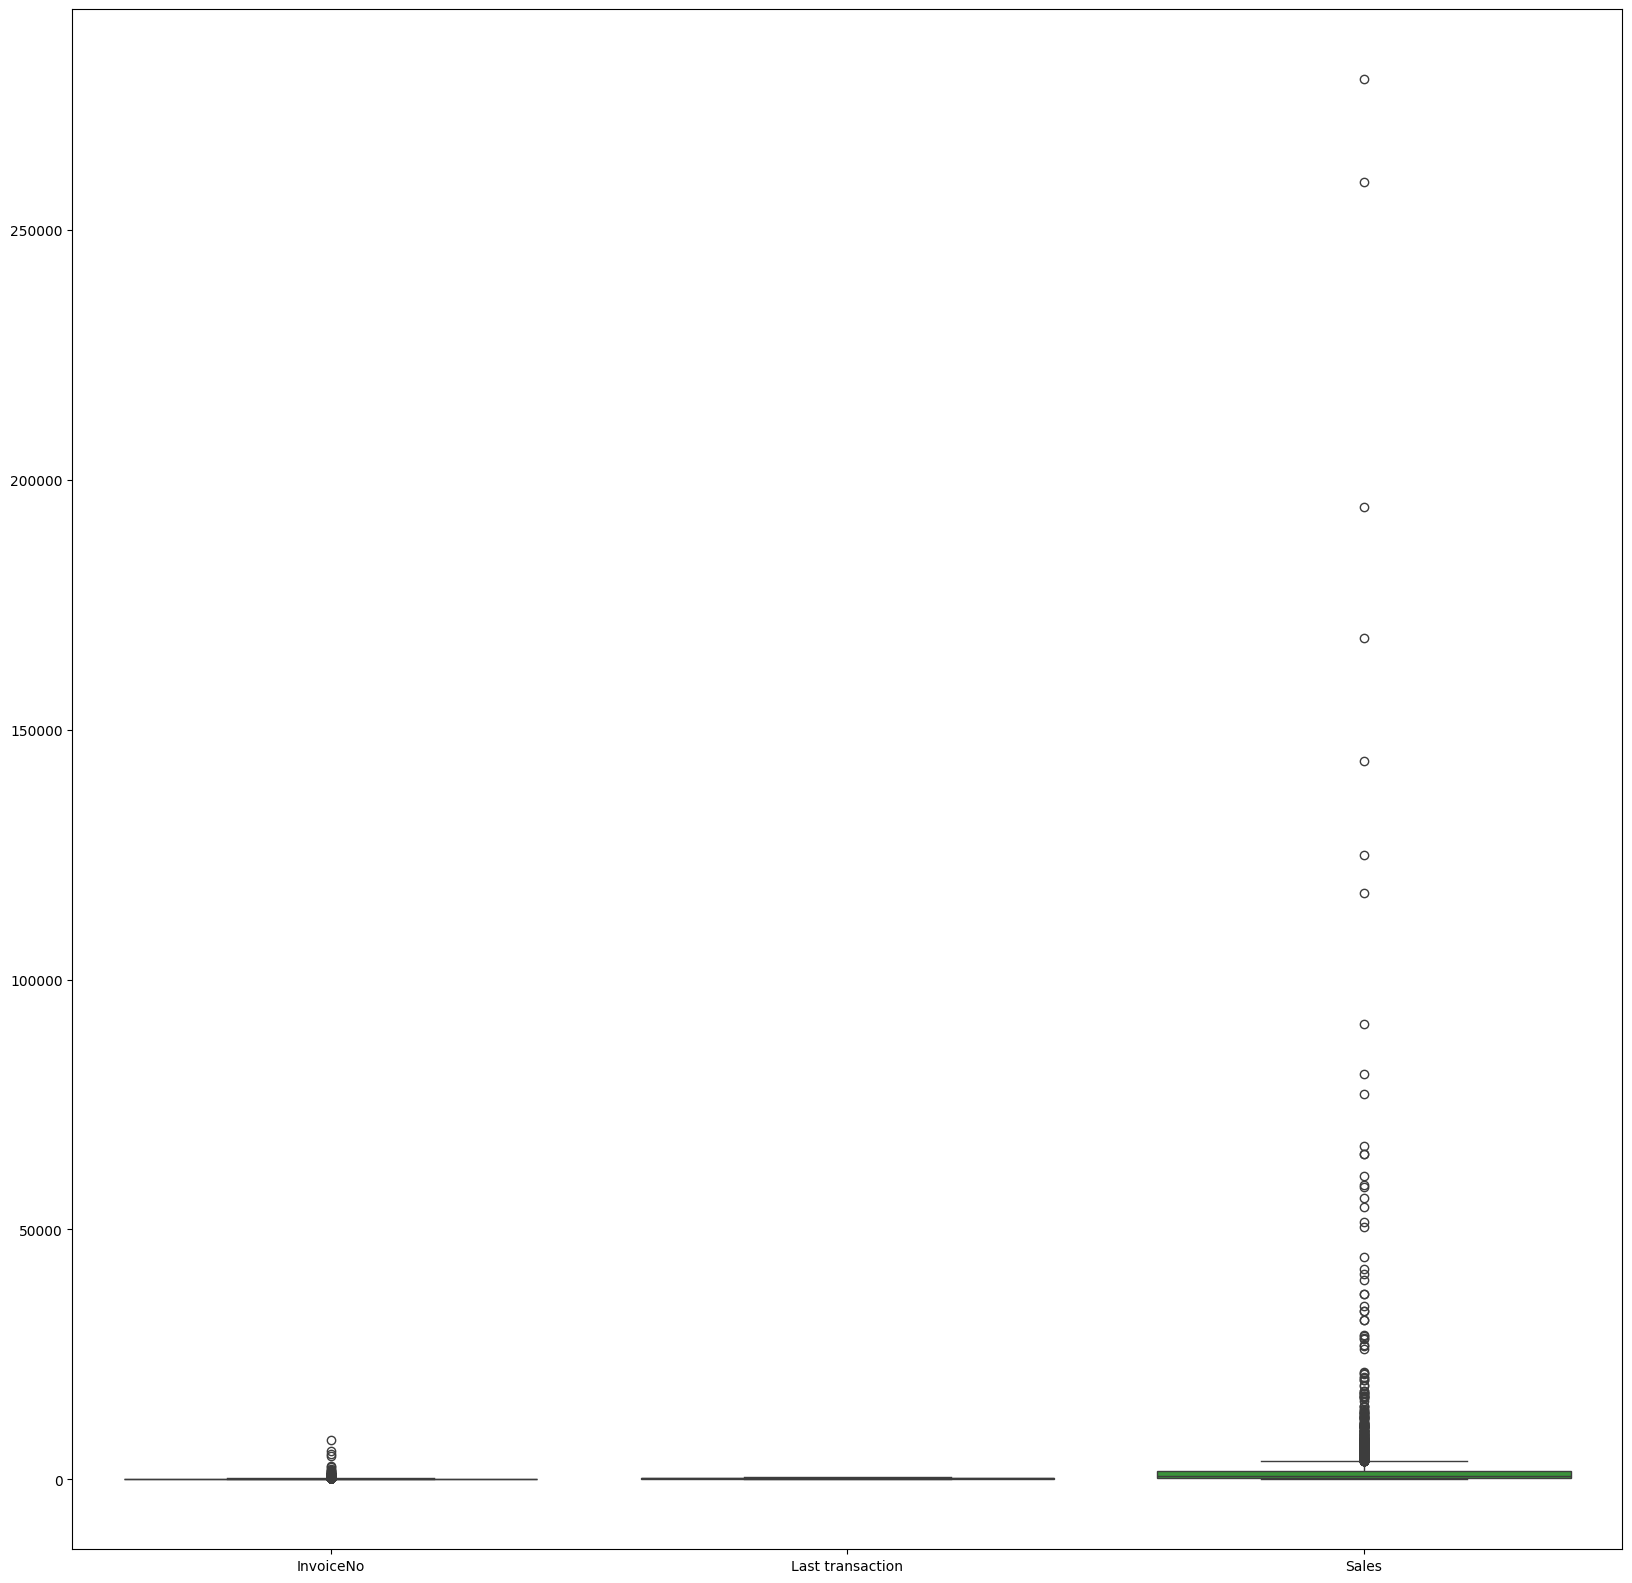

In [25]:


plt.figure(figsize=(20,20))
sns.boxplot(data=new_df[['InvoiceNo','Last transaction','Sales']])
plt.show()

In [26]:
IQR = new_df['Sales'].quantile(0.75) - new_df['Sales'].quantile(0.25)
lower_limit = new_df['Sales'].quantile(0.25) - 1.5 * IQR
upper_limit = new_df['Sales'].quantile(0.75) + 1.5 * IQR
new_df_iqr = new_df[(new_df['Sales'] < upper_limit) & (new_df['Sales'] > lower_limit)]
new_df_iqr.shape

(3923, 5)

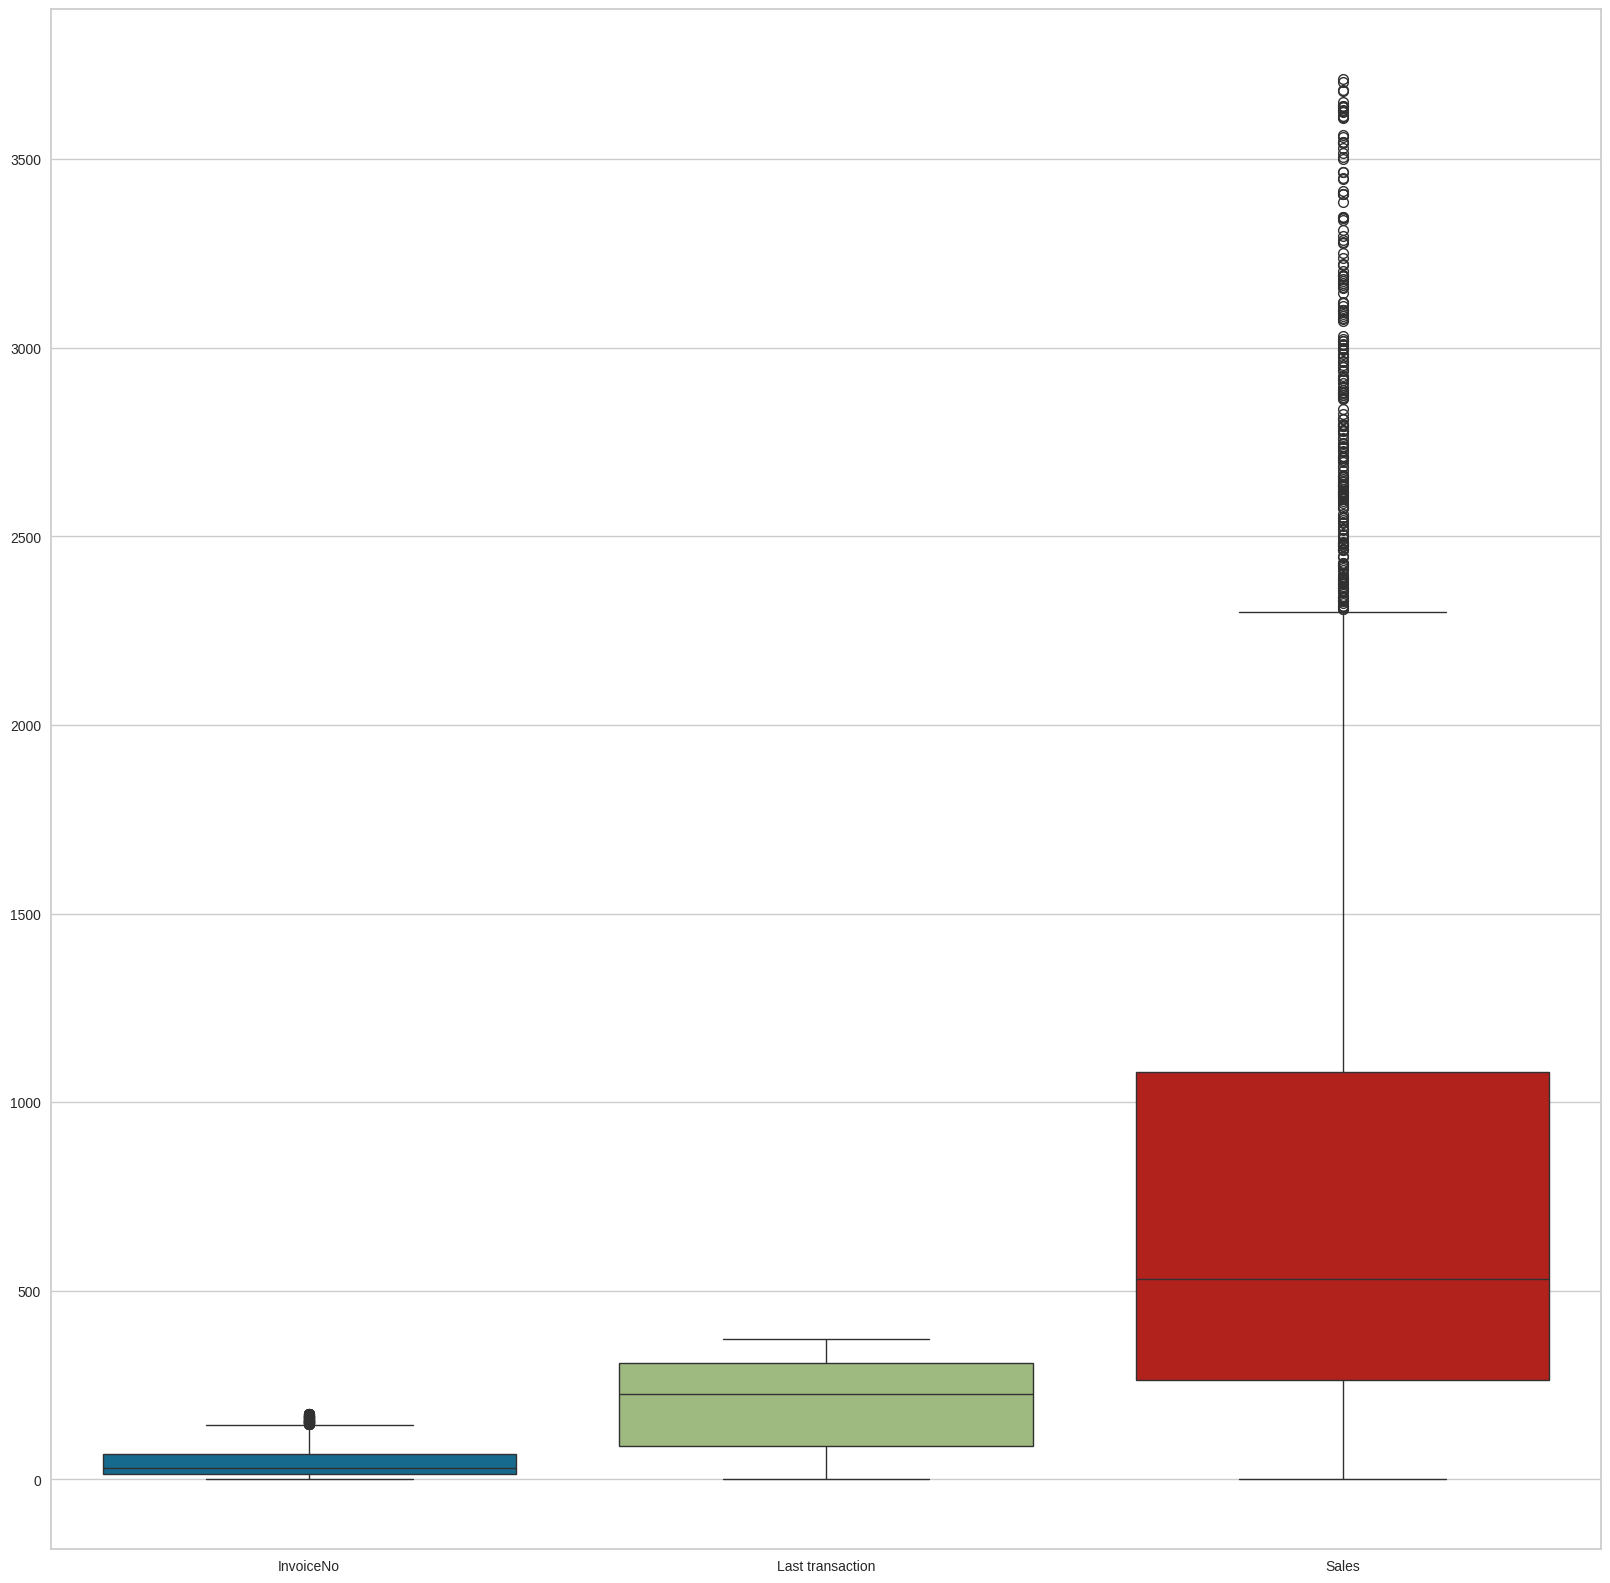

In [34]:
plt.figure(figsize=(20,20))
sns.boxplot(data=new_df_iqr[['InvoiceNo','Last transaction','Sales']])
plt.show()

In [35]:
new_df_iqr.reset_index(drop=True,inplace=True)
new_df_iqr

,CustomerID,Country,Last transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3659,18278.0,United Kingdom,73,9,173.90
3660,18280.0,United Kingdom,277,10,180.60
3661,18281.0,United Kingdom,180,7,80.82
3662,18282.0,United Kingdom,125,12,178.05


### Visualization od correlation matrix using heatmap

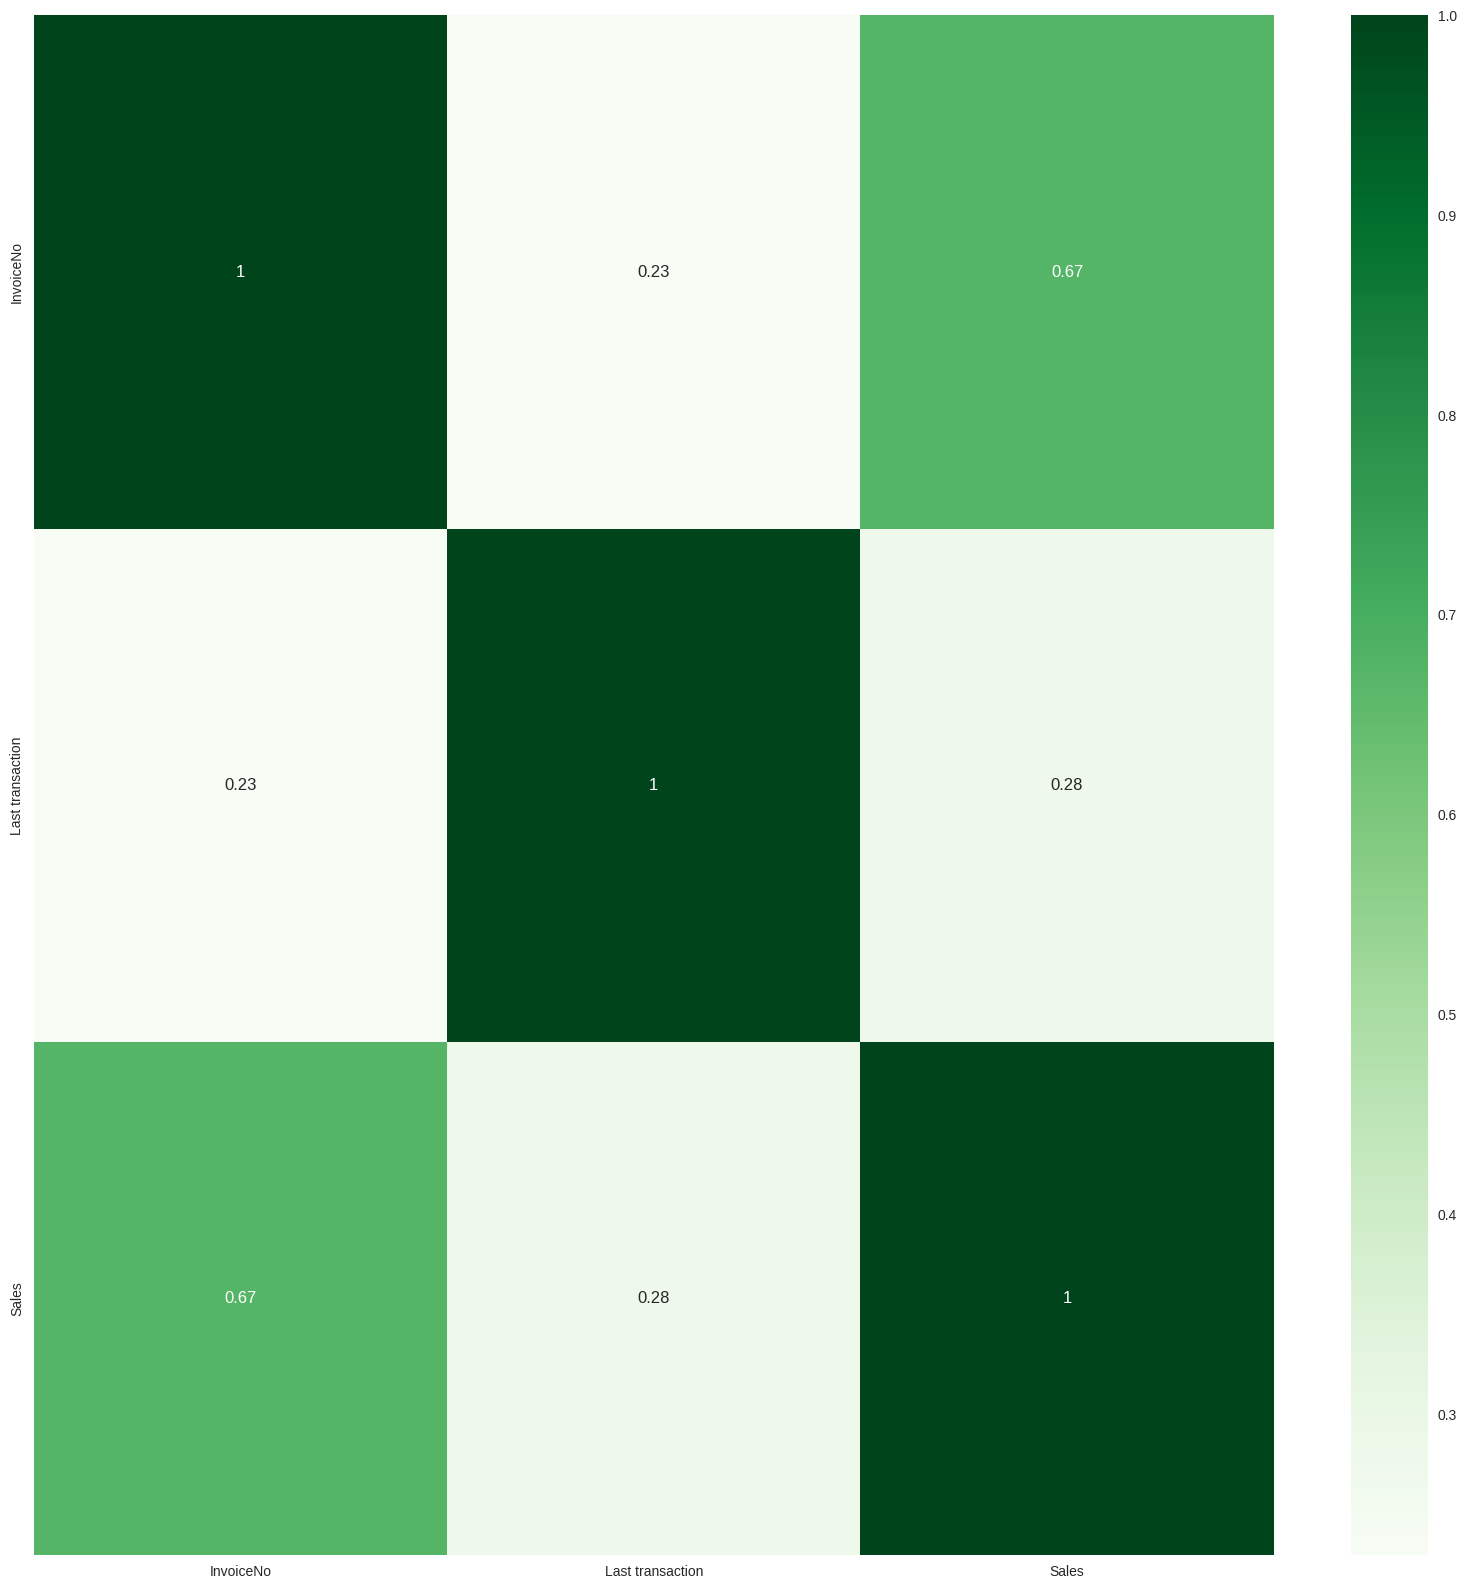

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_iqr[['InvoiceNo','Last transaction','Sales']].corr(),cmap='Greens',annot=True)
plt.show()

## Normalization of given dataset using MinMaxScaler

In [38]:
from sklearn.preprocessing import MinMaxScaler


In [39]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new_df_iqr[['InvoiceNo', 'Last transaction', 'Sales']])
scaled_df = pd.DataFrame(scaled_df, columns=['InvoiceNo', 'Last transaction', 'Sales'])
print(scaled_df.head())

   InvoiceNo  Last transaction     Sales
0   0.173410          0.957105  0.484200
1   0.416185          0.048257  0.473507
2   0.092486          0.828418  0.090092
3   0.485549          0.793566  0.675160
4   0.017341          0.544236  0.023978


# k-Means Clustering -Plot the graph using elbow method

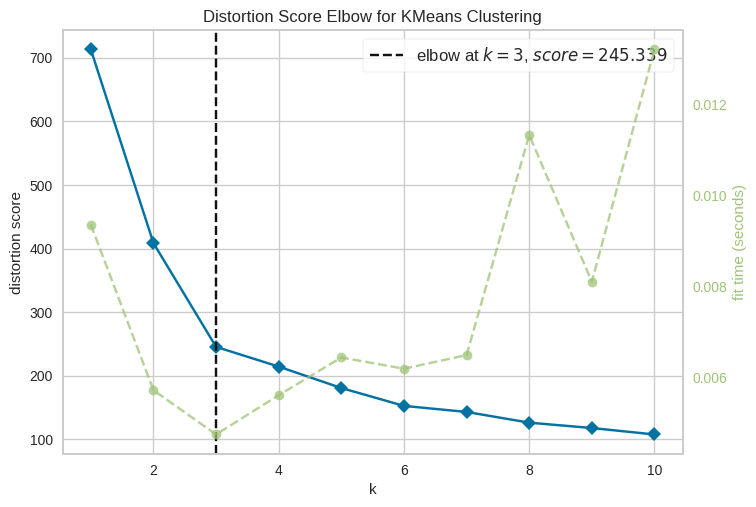

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
#!pip install yellowbrick
df_k=scaled_df
from yellowbrick.cluster import KElbowVisualizer
model=KMeans(random_state=42)
visualizer=KElbowVisualizer(model,k=(1,11))
visualizer.fit(df_k)
visualizer.show()

In [42]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_k)
df_k['clusters']=y_predicted
df_k

,InvoiceNo,Last transaction,Sales,clusters
0,0.173410,0.957105,0.484200,1
1,0.416185,0.048257,0.473507,0
2,0.092486,0.828418,0.090092,1
3,0.485549,0.793566,0.675160,2
4,0.017341,0.544236,0.023978,1
...,...,...,...,...
3659,0.046243,0.195710,0.046851,0
3660,0.052023,0.742627,0.048656,1
3661,0.034682,0.482574,0.021774,0
3662,0.063584,0.335121,0.047969,0


In [43]:
km.cluster_centers_

array([[0.17736451, 0.21216993, 0.13576932],
       [0.16296232, 0.76945958, 0.1494494 ],
       [0.62868077, 0.75689365, 0.51593055]])

## Model Evaluation

In [44]:
from sklearn.metrics import silhouette_samples,silhouette_score
score=silhouette_score(df_k,km.labels_,metric='euclidean')
score

np.float64(0.7270861730105923)

In [47]:
from sklearn.cluster import AgglomerativeClustering
hierarchial=AgglomerativeClustering(n_clusters=3)
y_predicted_hierarchial=hierarchial.fit_predict(df_k)
df_k['clusters_hierarchial']=y_predicted
df_k

,InvoiceNo,Last transaction,Sales,clusters,clusters_hierarchial
0,0.173410,0.957105,0.484200,1,1
1,0.416185,0.048257,0.473507,0,0
2,0.092486,0.828418,0.090092,1,1
3,0.485549,0.793566,0.675160,2,2
4,0.017341,0.544236,0.023978,1,1
...,...,...,...,...,...
3659,0.046243,0.195710,0.046851,0,0
3660,0.052023,0.742627,0.048656,1,1
3661,0.034682,0.482574,0.021774,0,0
3662,0.063584,0.335121,0.047969,0,0


In [49]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2,min_samples=4)
y_predicted_dbscan=dbscan.fit_predict(df_k)
df_k['clusters_dbscan']=y_predicted
df_k

,InvoiceNo,Last transaction,Sales,clusters,clusters_hierarchial,clusters_dbscan
0,0.173410,0.957105,0.484200,1,1,1
1,0.416185,0.048257,0.473507,0,0,0
2,0.092486,0.828418,0.090092,1,1,1
3,0.485549,0.793566,0.675160,2,2,2
4,0.017341,0.544236,0.023978,1,1,1
...,...,...,...,...,...,...
3659,0.046243,0.195710,0.046851,0,0,0
3660,0.052023,0.742627,0.048656,1,1,1
3661,0.034682,0.482574,0.021774,0,0,0
3662,0.063584,0.335121,0.047969,0,0,0
